# Python for Data Analysis


#### Research Computing Services
Website: [rcs.bu.edu](http://www.bu.edu/tech/support/research/) <br>

Tutorial materials: [http://rcs.bu.edu/examples/python/data_analysis](http://rcs.bu.edu/examples/python/data_analysis)



In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

Pandas is a python package that deals mostly with :
- **Series**  (1d homogeneous array)
- **DataFrame** (2d labeled heterogeneous array) 
- **Panel** (general 3d array)

### Pandas Series

Pandas *Series* is one-dimentional labeled array containing data of the same type (integers, strings, floating point numbers, Python objects, etc. ). The axis labels are often referred to as *index*.

In [2]:
# Create Pandas series :
s1 = pd.Series( [2, 9, 6, -4, 8, -1] )
print(s1)

0    2
1    9
2    6
3   -4
4    8
5   -1
dtype: int64


We did not pass any index, so by default, it assigned the indexes ranging from 0 to len(data)-1

In [3]:
# View index values :
print(s1.index)

RangeIndex(start=0, stop=6, step=1)


In [4]:
# Creating Pandas series with index :
s2 = pd.Series( np.random.randn(6), index=['a', 'b', 'c', 'd', 'e', 'f'] )
print(s2)

a    1.470397
b    0.092552
c    1.134563
d   -2.155917
e   -0.505634
f   -0.582606
dtype: float64


In [5]:
# View index values :
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')


In [6]:
# Create a Series from dictionary :
data = {'a':10, 'b':6, 'c':2, 'd':7}  # dictionary
print(data)
s3 = pd.Series ( data )
print(s3)

{'a': 10, 'b': 6, 'c': 2, 'd': 7}
a    10
b     6
c     2
d     7
dtype: int64


In [7]:
# reordering the elements
s4 = pd.Series ( data, index = ['a', 'b', 'c', 'e', 'd'])
print(s4)

a    10.0
b     6.0
c     2.0
e     NaN
d     7.0
dtype: float64


NAN (non a number) - is used to specify a missing value in Pandas.

In [8]:
s1[:2] # First 2 elements


0    2
1    9
dtype: int64

In [9]:
print( s1[ [2,1,0]])  # Elements out of order

2    6
1    9
0    2
dtype: int64


In [10]:
type(s1)

pandas.core.series.Series

In [11]:
# Series can be used as a usual one-dimentional array (ndarray):
print("Median:" , s4.median())

Median: 6.5


In [12]:
s1[s1 > 0]

0    2
1    9
2    6
4    8
dtype: int64

In [13]:
# Numpy methods used on series :
s4[s4 > s4.median()]

a    10.0
d     7.0
dtype: float64

#### Methods:

|  Method | Description |
|-----|-----|
| dtype | data type of values in series |
| empty | True if series is empty |
| size | number of elements |
| values | Returns values as ndarray |
| head() | First n elements |
| tail() | Last n elements |


### Pandas DataFrame


Pandas *DataFrame* is two-dimensional, size-mutable, heterogeneous tabular data structure with labelled rows and columns. It is comparable to a dictionary and can be used to store Python Series objects.

In [14]:
d1 =  pd.DataFrame({ 'Name': pd.Series(['Chris','James','Tom']), 
                  'Age': pd.Series([23,29,25]) } )
print(d1)

    Name  Age
0  Chris   23
1  James   29
2    Tom   25


In [15]:
d2 = pd.DataFrame(np.array([['Chris','James','Tom'],[23,29,25]]).T, columns=['Name','Age'])

In [16]:
d2

,Name,Age
0,Chris,23
1,James,29
2,Tom,25


In [17]:
#Add a new column :
d1['height'] = pd.Series([5.6 ,6.1,5.2])
d1

,Name,Age,height
0,Chris,23,5.6
1,James,29,6.1
2,Tom,25,5.2


In [18]:
#Read csv file :
df = pd.read_csv("http://rcs.bu.edu/examples/python/data_analysis/Salaries.csv")


In [19]:
#Display a few first records :
df.head(10)#Display a few first records :
df.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [20]:
# Display structure of the data frame :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In the input file, column names may contain special characters or are unnecessarily long. In these scenarios, we need to rename the columns to make them easier to deal with.

In [21]:
# Create a copy of this dataframe with a new column names :
# we can also add inplace=True argument, if we will not create new columns :
df_new =df.rename(columns={'discipline': 'subject', 'sex': 'gender' })

---
*Exercise* 

In [22]:
#Display first 20 records :
df.head(20)


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [23]:
#Display the last 5 records
df.tail(5)

,rank,discipline,phd,service,sex,salary
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


---

### Data Exploration

In [24]:
#Identify the type of 'df' object :
type(df)

pandas.core.frame.DataFrame

In [27]:
#Check the type of a column "salary" :
df['salary'].dtype

dtype('int64')

In [28]:
#List the types of all columns :
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [29]:
#List the column names :
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [30]:
#List the row labels and the column names :
df.axes

[RangeIndex(start=0, stop=78, step=1),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

In [31]:
#Total number of elements in the DataFrame :
df.size

468

In [32]:
#Shape of table (number of rows and columns) :
df.shape

(78, 6)

In [33]:
#Output basic statistics for the numeric columns :
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [34]:
# Create a new column :
df = df.assign( salary_k = lambda x: x.salary/100.0)
df.head(10)

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,1869.60
1,Prof,A,12,6,Male,93000,930.00
2,Prof,A,23,20,Male,110515,1105.15
3,Prof,A,40,31,Male,131205,1312.05
4,Prof,B,20,18,Male,104800,1048.00
5,Prof,A,20,20,Male,122400,1224.00
6,AssocProf,A,20,17,Male,81285,812.85
7,Prof,A,18,18,Male,126300,1263.00
8,Prof,A,29,19,Male,94350,943.50
9,Prof,A,51,51,Male,57800,578.00


In [35]:
# Check unique values in a column :
df['rank'].unique()

array(['Prof', 'AssocProf', 'AsstProf'], dtype=object)

In [36]:
# Get frequency table for a binary column :
df['rank'].value_counts()

Prof         46
AsstProf     19
AssocProf    13
Name: rank, dtype: int64

In [37]:
# Get a proportion table :
df['rank'].value_counts()/sum(df['rank'].value_counts())

Prof         0.589744
AsstProf     0.243590
AssocProf    0.166667
Name: rank, dtype: float64

In [38]:
#Alternate, pandas function crosstab() :
pd.crosstab(index=df['rank'], columns="count")


col_0,count
rank,
AssocProf,13
AsstProf,19
Prof,46


In [39]:
# Two-way tables
pd.crosstab(index=df['rank'], columns=df['discipline'], margins=True)

discipline,A,B,All
rank,,,
AssocProf,5,8,13
AsstProf,8,11,19
Prof,23,23,46
All,36,42,78


---
### Data slicing and grouping

In [40]:
#Extract a column by name :
df['salary'].head()

0    186960
1     93000
2    110515
3    131205
4    104800
Name: salary, dtype: int64

In [41]:
# We can employ a dot notation if the column name does not conflict with data frame techniques and does not contain spaces or other special characters :
df.sex.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

In [42]:
# Calculate median of number of service years :
df.service.median()

14.5

---
*Exercise* 

In [43]:
# Calculate the basic statistics for the salary column :
df.describe()

,phd,service,salary,salary_k
count,78.000000,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051,1080.237821
std,12.498425,12.139768,28293.661022,282.936610
min,1.000000,0.000000,57800.000000,578.000000
25%,10.250000,5.250000,88612.500000,886.125000
50%,18.500000,14.500000,104671.000000,1046.710000
75%,27.750000,20.750000,126774.750000,1267.747500
max,56.000000,51.000000,186960.000000,1869.600000


In [44]:
# Calculate how many values in the salary column (use count() method)
df.salary.count()

78

In [45]:
# Calculate the average (mean) salary
df.salary.mean()

108023.78205128205

---

In [46]:
#Group data using rank
df_rank = df.groupby('rank')

In [47]:
#Calculate mean of all numeric columns for the grouped object :
df_rank.mean()

,phd,service,salary,salary_k
rank,,,,
AssocProf,15.076923,11.307692,91786.230769,917.862308
AsstProf,5.052632,2.210526,81362.789474,813.627895
Prof,27.065217,21.413043,123624.804348,1236.248043


In [48]:
#The "grouping" object is typically not stored but rather exploited as a step to generate a summary :
df.groupby('sex').mean()

,phd,service,salary,salary_k
sex,,,,
Female,16.512821,11.564103,101002.410256,1010.024103
Male,22.897436,18.538462,115045.153846,1150.451538


In [49]:
#Calculate the mean salary for men and women :
df.groupby('sex')['salary'].mean()

sex
Female    101002.410256
Male      115045.153846
Name: salary, dtype: float64

In [50]:
# If we use double brackets Pandas will produce a DataFrame
df.groupby('sex')[['salary']].mean()

,salary
sex,
Female,101002.410256
Male,115045.153846


In [51]:
# Group using 2 variables - sex and rank:
df.groupby(['rank','sex'], sort=True)[['salary']].mean()

salary
rank      sex                  
AssocProf Female   88512.800000
          Male    102697.666667
AsstProf  Female   78049.909091
          Male     85918.000000
Prof      Female  121967.611111
          Male    124690.142857

---
*Exercise* 

In [52]:
# Group data by the discipline and find the average salary for each group :
df.groupby('discipline')[['salary']].mean()

,salary
discipline,
A,98331.111111
B,116331.785714


---
### Filtering

In [53]:
#Select observation with the value in the salary column > 120K
df_sub = df[ df.salary > 100000]
df_sub.head()

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,1869.60
2,Prof,A,23,20,Male,110515,1105.15
3,Prof,A,40,31,Male,131205,1312.05
4,Prof,B,20,18,Male,104800,1048.00
5,Prof,A,20,20,Male,122400,1224.00


In [54]:
df_sub.axes

[Int64Index([ 0,  2,  3,  4,  5,  7, 10, 11, 13, 14, 15, 18, 19, 21, 26, 27, 29,
             30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 44, 45, 47, 48, 49, 51, 52,
             58, 59, 61, 62, 65, 69, 72, 73, 74, 75, 76, 77],
            dtype='int64'),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary', 'salary_k'], dtype='object')]

In [55]:
#Selected data for female professors :
df_w = df[ df.sex == 'Female']
df_w.head()

,rank,discipline,phd,service,sex,salary,salary_k
39,Prof,B,18,18,Female,129000,1290.00
40,Prof,A,39,36,Female,137000,1370.00
41,AssocProf,A,13,8,Female,74830,748.30
42,AsstProf,B,4,2,Female,80225,802.25
43,AsstProf,B,5,0,Female,77000,770.00


In [56]:
# Use the "where" method to subset one column based on a condition in another column :
df.salary.where(df.sex=='Female').dropna().head(7)

39    129000.0
40    137000.0
41     74830.0
42     80225.0
43     77000.0
44    151768.0
45    140096.0
Name: salary, dtype: float64

---
*Exercise* 

In [57]:
# Using filtering, find the mean value of the salary for the discipline A
a=df[df["discipline"]=="A"]
a=a.groupby("discipline")[["salary"]].mean()
print(a)


                  salary
discipline              
A           98331.111111


In [58]:
# Challange:
# Extract (filter) only observations with high salary ( > 100K) and find how many female and male professors in each group :
df[df['salary'] > 100000].groupby('sex')[['salary']].count()


,salary
sex,
Female,21
Male,25


---
### More on slicing the dataset

In [59]:
#Select column salary :
salary = df['salary']

In [60]:
#Data type of the salary :
type(salary)

pandas.core.series.Series

In [61]:
#First few elements of the output :
salary.head()

0    186960
1     93000
2    110515
3    131205
4    104800
Name: salary, dtype: int64

In [62]:
#Write salary column in a dataFrame type :
df2 = df[['salary']]

In [63]:
#Check the type
type(df2)

pandas.core.frame.DataFrame

In [64]:
#Select a subset of rows (based on their position):
# Note 1: First row will count as 0
# Note 2: The last value in the range is excluded
df[0:10]
df[0:10]
df[0:10]
df[0:10]
df[0:10]
df[0:10]
df[0:10]

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,1869.60
1,Prof,A,12,6,Male,93000,930.00
2,Prof,A,23,20,Male,110515,1105.15
3,Prof,A,40,31,Male,131205,1312.05
4,Prof,B,20,18,Male,104800,1048.00
5,Prof,A,20,20,Male,122400,1224.00
6,AssocProf,A,20,17,Male,81285,812.85
7,Prof,A,18,18,Male,126300,1263.00
8,Prof,A,29,19,Male,94350,943.50
9,Prof,A,51,51,Male,57800,578.00


In [65]:
#To select both rows and columns use Method (.loc) :
df.loc[10:20,['rank', 'sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
16,AsstProf,Male,75044
17,AsstProf,Male,92000
18,Prof,Male,107300
19,Prof,Male,150500


In [66]:
df_sub.head(13)

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,1869.60
2,Prof,A,23,20,Male,110515,1105.15
3,Prof,A,40,31,Male,131205,1312.05
4,Prof,B,20,18,Male,104800,1048.00
5,Prof,A,20,20,Male,122400,1224.00
7,Prof,A,18,18,Male,126300,1263.00
10,Prof,B,39,33,Male,128250,1282.50
11,Prof,B,23,23,Male,134778,1347.78
13,Prof,B,35,33,Male,162200,1622.00
14,Prof,B,25,19,Male,153750,1537.50


In [67]:
#Our df_sub dataFrame :
# Method (.loc) subset the dataFrame based on the labels:
df_sub.loc[10:20,['rank','sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
18,Prof,Male,107300
19,Prof,Male,150500


In [68]:
#  Unlike method (.loc), Method (iloc) selects rows (and columns) by position:
df_sub.iloc[11:21, [0,3,4,5]]

,rank,service,sex,salary
18,Prof,7,Male,107300
19,Prof,27,Male,150500
21,Prof,30,Male,103106
26,Prof,19,Male,148750
27,Prof,43,Male,155865
29,Prof,20,Male,123683
30,AssocProf,7,Male,107008
31,Prof,21,Male,155750
32,Prof,19,Male,103275
33,Prof,18,Male,120000


### Sorting the Data

In [69]:
#Sort the dataFrame by yrs.service and create a new dataFrame :
df_sorted = df.sort_values(by = 'service')
df_sorted.head()

,rank,discipline,phd,service,sex,salary,salary_k
55,AsstProf,A,2,0,Female,72500,725.0
23,AsstProf,A,2,0,Male,85000,850.0
43,AsstProf,B,5,0,Female,77000,770.0
17,AsstProf,B,4,0,Male,92000,920.0
12,AsstProf,B,1,0,Male,88000,880.0


In [70]:
#Sort the dataFrame by yrs.service and overwrite the original dataset :
df.sort_values(by = 'service', ascending = False, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary,salary_k
9,Prof,A,51,51,Male,57800,578.00
0,Prof,B,56,49,Male,186960,1869.60
36,Prof,B,45,45,Male,146856,1468.56
27,Prof,A,45,43,Male,155865,1558.65
40,Prof,A,39,36,Female,137000,1370.00


In [71]:
# Restore the original order :
df.sort_index(axis=0, ascending = True, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,1869.60
1,Prof,A,12,6,Male,93000,930.00
2,Prof,A,23,20,Male,110515,1105.15
3,Prof,A,40,31,Male,131205,1312.05
4,Prof,B,20,18,Male,104800,1048.00


*Exercise* 

In [72]:
# Sort dataFrame by the salary (in descending order) and display the first few records of the output (head) :
df.sort_values(by = 'salary', ascending = False, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,1869.60
13,Prof,B,35,33,Male,162200,1622.00
72,Prof,B,24,15,Female,161101,1611.01
27,Prof,A,45,43,Male,155865,1558.65
31,Prof,B,22,21,Male,155750,1557.50


---

In [73]:
#Sort the data frame using 2 or more columns:
df_sorted = df.sort_values(by = ['service', 'salary'], ascending = [True,False])
df_sorted.head(10)

,rank,discipline,phd,service,sex,salary,salary_k
52,Prof,A,12,0,Female,105000,1050.00
17,AsstProf,B,4,0,Male,92000,920.00
12,AsstProf,B,1,0,Male,88000,880.00
23,AsstProf,A,2,0,Male,85000,850.00
43,AsstProf,B,5,0,Female,77000,770.00
55,AsstProf,A,2,0,Female,72500,725.00
57,AsstProf,A,3,1,Female,72500,725.00
28,AsstProf,B,7,2,Male,91300,913.00
42,AsstProf,B,4,2,Female,80225,802.25
68,AsstProf,A,4,2,Female,77500,775.00


### Missing Values

In [74]:
# Read a dataset with missing values :
flights = pd.read_csv("http://rcs.bu.edu/examples/python/data_analysis/flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [75]:
flights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


In [76]:
# Select the rows that have atleast one missing value :
flights[flights.isnull().any(axis=1)].head()# Select the rows that have atleast one missing value :
flights[flights.isnull().any(axis=1)].head()# Select the rows that have atleast one missing value :
flights[flights.isnull().any(axis=1)].head()# Select the rows that have atleast one missing value :
flights[flights.isnull().any(axis=1)].head()# Select the rows that have atleast one missing value :
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [77]:
# Filter the rows for missing arr_delay value :
flights1 = flights[ flights['arr_delay'].notnull( )]
flights1.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [78]:
# Remove observations with missing values :
flights2 = flights.dropna()

In [79]:
# Fill missing values with zeros :
nomiss =flights['dep_delay'].fillna(0)
nomiss.isnull().any()

False

---
*Exercise* 

In [80]:
# Count how many missing data are in dep_delay and arr_delay columns
print(" \nCount total NaN at dep_delay in a DataFrame : \n\n", flights['dep_delay'].isnull().sum())
print(" \nCount total NaN at arr_delay in a DataFrame : \n\n",flights['arr_delay'].isnull().sum())


 
Count total NaN at dep_delay in a DataFrame : 

 2336
 
Count total NaN at arr_delay in a DataFrame : 

 2827


---
### Common Aggregation Functions:

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



In [83]:
# Number of non-missing values in each column :
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [84]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


In [85]:
# Mean value for all the columns :
flights.min()
flights.min()
flights.min()
flights.min()
flights.min()
flights.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ip

year         2013
month           1
day             1
dep_time      1.0
dep_delay   -33.0
arr_time      1.0
arr_delay   -75.0
carrier        AA
flight          1
origin        EWR
dest          ANC
air_time     21.0
distance       17
hour          0.0
minute        0.0
dtype: object

In [86]:
# Summary statistic as per group :
flights.groupby('carrier')['dep_delay'].mean()

carrier
AA     8.586016
AS     5.804775
DL     9.264505
UA    12.106073
US     3.782418
Name: dep_delay, dtype: float64

In [87]:
# Use agg() methods for aggregation :
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.463773,2.094537
max,1014.000000,1007.000000


In [88]:
# Compute different statistics for different columns :
flights.agg({'arr_delay':['min','mean',max], 'carrier':['nunique']})

,arr_delay,carrier
min,-75.000000,NaN
mean,2.094537,NaN
max,1007.000000,NaN
nunique,NaN,5.0


# New section

### Basic descriptive statistics

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %


In [89]:
# Convinient describe() function :
flights.arr_delay.describe()

count    157927.000000
mean          2.094537
std          41.479349
min         -75.000000
25%         -19.000000
50%          -7.000000
75%           9.000000
max        1007.000000
Name: arr_delay, dtype: float64

In [90]:
# Index of the max/min value :
# For multiple values matching index_min() and index_max(), we will return to the first match :
flights['arr_delay'].idxmin()  #minimum value

93162

In [91]:
# Count the number of records for each different value in a vector :
flights['carrier'].value_counts()

UA    58665
DL    48110
AA    32729
US    20536
AS      714
Name: carrier, dtype: int64

### Explore data using graphics

In [92]:
#Show graphs withint Python notebook
%matplotlib inline

(array([2.97782119e-06, 1.48891059e-05, 1.19112848e-05, 1.38964989e-05,
        8.93346356e-06, 1.09186777e-05, 3.97042825e-06, 7.94085650e-06,
        9.92607063e-07, 9.92607063e-07]),
 array([ 57800.,  70716.,  83632.,  96548., 109464., 122380., 135296.,
        148212., 161128., 174044., 186960.]),
 <a list of 10 Patch objects>)

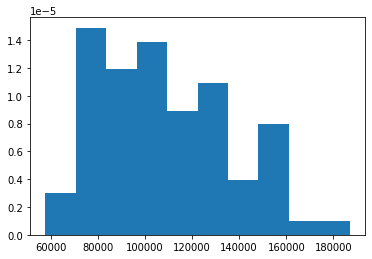

In [93]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(df['salary'],bins=10, density=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


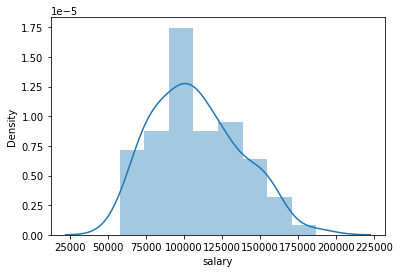

In [94]:
#Use seaborn package to draw a histogram
sns.distplot(df['salary']);

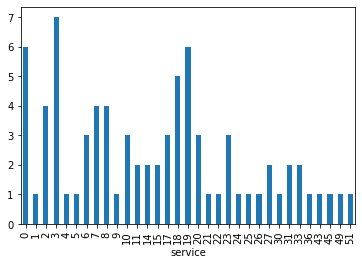

In [95]:
# Matplotlib function to display a barplot :
df.groupby(['service'])['salary'].count().plot(kind='bar')

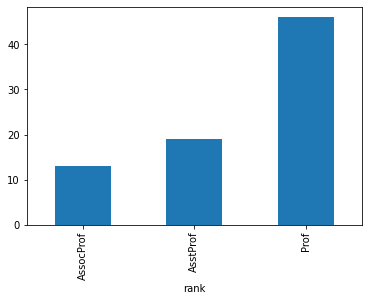

In [96]:
df.groupby(['rank'])['salary'].count().plot(kind='bar')

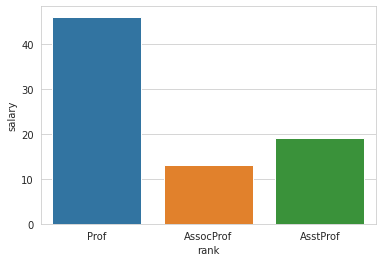

In [97]:
# Barplot using seaborn :
sns.set_style("whitegrid")

ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)

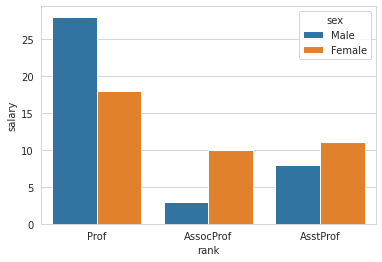

In [98]:
# Split into two groups :
ax = sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=len)

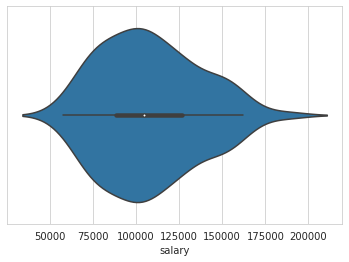

In [99]:
#Violin_plot :
sns.violinplot(x = "salary", data=df)

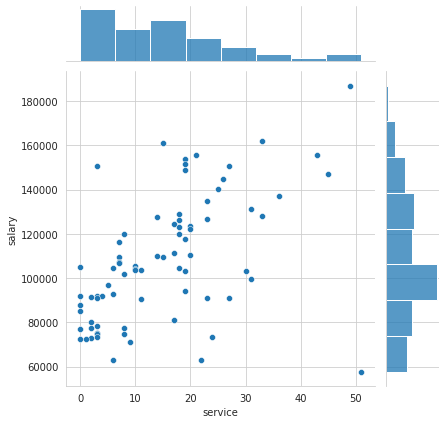

In [100]:
#Scatterplot using seaborn :
sns.jointplot(x='service', y='salary', data=df)

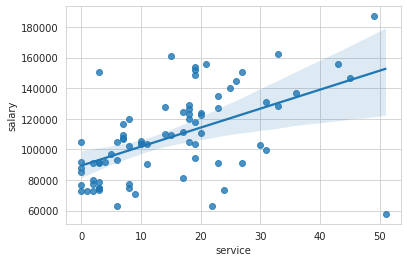

In [101]:
#Linear regression plot for two numeric variables using regplot :
sns.regplot(x='service', y='salary', data=df)

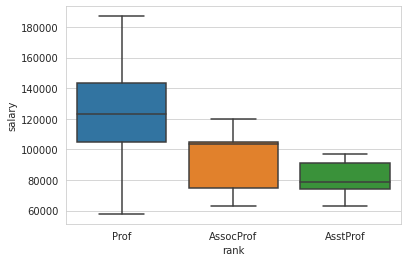

In [102]:
# box plot :
sns.boxplot(x='rank',y='salary', data=df)

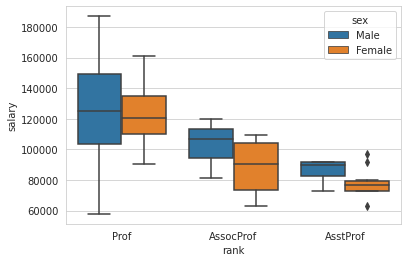

In [103]:
# side-by-side box plot :
sns.boxplot(x='rank',y='salary', data=df, hue='sex')

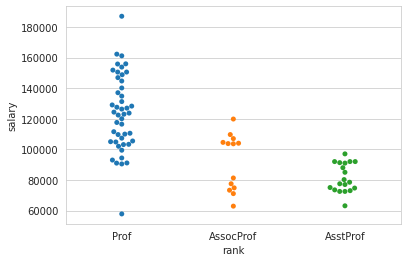

In [104]:
# swarm plot :
sns.swarmplot(x='rank',y='salary', data=df)

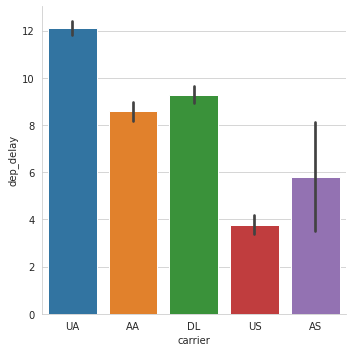

In [105]:
#factor_plot :
sns.catplot(x='carrier',y='dep_delay', data=flights, kind='bar')

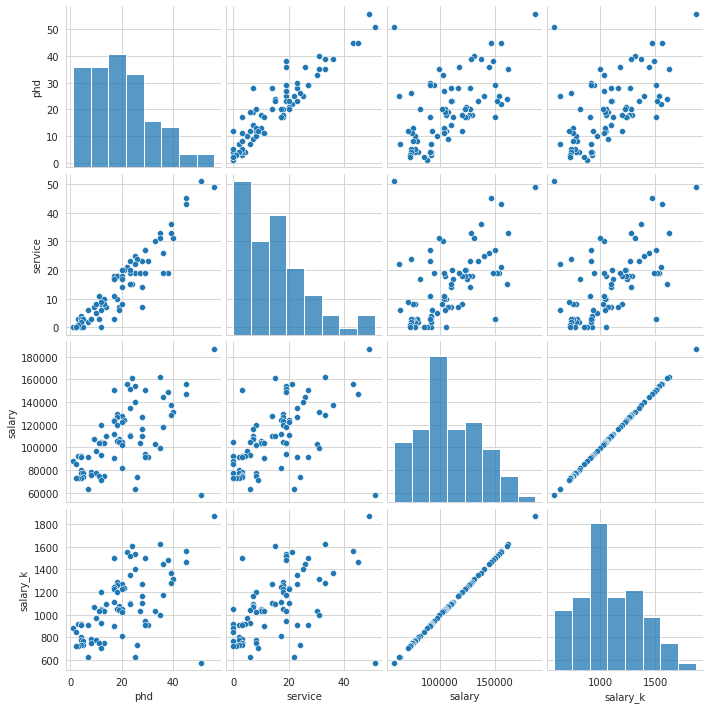

In [106]:
# Pairplot 
sns.pairplot(df)

---
*Exercise*

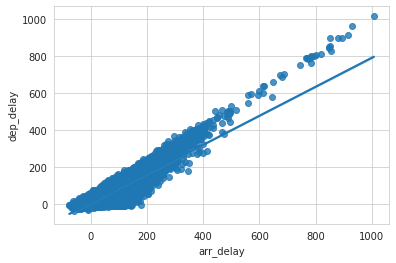

In [110]:
#Using seaborn package explore the dependency of arr_delay on dep_delay (regplot or scatterplot) using flights dataset
sns.regplot(x='arr_delay', y='dep_delay', data=flights)

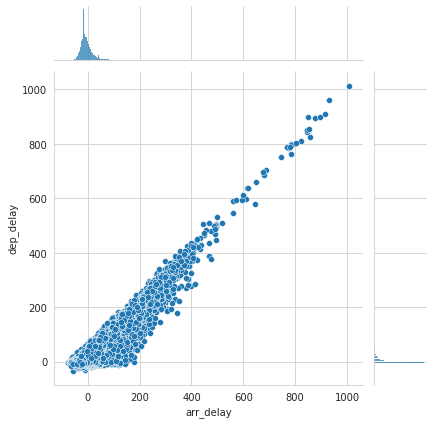

In [109]:
sns.jointplot(x='arr_delay', y='dep_delay', data=flights)

---
## Basic statistical Analysis

### Linear Regression

In [111]:
# Import Statsmodel functions :
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [112]:
# create a fitted model :
lm = sm.OLS(df.service, df.salary).fit()

#print model summary :
print(lm.summary())
print(lm.summary())
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                service   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              183.1
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                    4.78e-22
Time:                        12:11:05   Log-Likelihood:                         -294.05
No. Observations:                  78   AIC:                                      590.1
Df Residuals:                      77   BIC:                                      592.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [113]:
# print the coefficients : 
lm.params

salary    0.000145
dtype: float64

In [114]:
#using scikit-learn :
from sklearn import linear_model
est = linear_model.LinearRegression(fit_intercept = True)   # create estimator object
est.fit(df[['service']], df[['salary']])

#print result
print("Coef:", est.coef_, "\nIntercept:", est.intercept_)


Coef: [[1240.3566535]] 
Intercept: [89354.82421525]


---
### Student T-test

In [115]:
# Using scipy package:
from scipy import stats
df_w = df[ df['sex'] == 'Female']['salary']
df_m = df[ df['sex'] == 'Male']['salary']
stats.ttest_ind(df_w, df_m)   

Ttest_indResult(statistic=-2.2486865976699053, pvalue=0.027429778657910103)